# Problem Statement

In [34]:
# !pip install tensorflow-hub


# 1. Importing the Libraries and Dependencies

In [33]:
import os
import cv2
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_hub as hub

# 2. Understading the dataset

In [2]:
path, dirs, file = next(os.walk(r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train"))
file_count = len(file)
print('Number of images: ', file_count)

Number of images:  25000


In [3]:
# file_name = os.listdir(r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train")
# print(file_name)                       

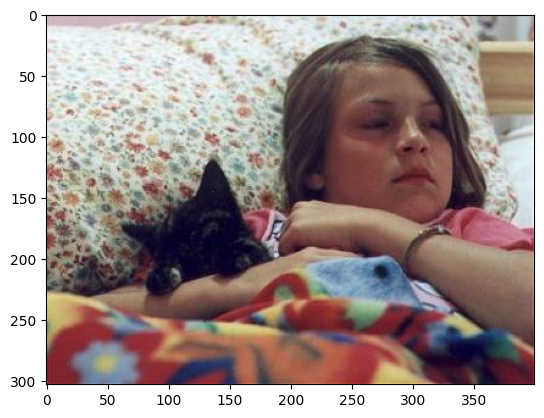

In [4]:
img = mpimg.imread(r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train\cat.6.jpg")
plt.imshow(img)

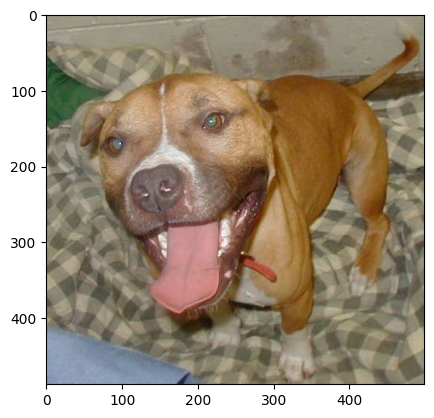

In [5]:
img = mpimg.imread(r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train\dog.6.jpg")
plt.imshow(img)

In [6]:
file_name = os.listdir(r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train")
for i in range(5):
    name = file_name[i]
    print(name[0:3])
    

cat
cat
cat
cat
cat


In [7]:
file_name = os.listdir(r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train")
dog_count=0
cat_count=0
for img_file in file_name:
    name = img_file[0:3]
    if name =='dog':
        dog_count+=1
    else:
        cat_count +=1

print('Number of dog image:', dog_count)
print('Number of cat image:', cat_count)
    

Number of dog image: 12500
Number of cat image: 12500


# 3. Resizing all the images

In [12]:
resize_dir = r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train_resized"
os.makedirs(resize_dir, exist_ok=True)


In [ ]:
# # Folder paths (strings, NOT lists)
# original_path = r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train"
# resized_path = r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train_resized"

# # Create output folder if it doesn't exist
# os.makedirs(resized_path, exist_ok=True)

# # Get list of image filenames
# original_files = os.listdir(original_path)

# for filename in original_files[:2000]:
#     try:
#         img_path = os.path.join(original_path, filename)

#         img = Image.open(img_path)
#         img = img.resize((224, 224))     # ✅ correct
#         img = img.convert("RGB")

#         new_img_path = os.path.join(resized_path, filename)
#         img.save(new_img_path)

#     except Exception as e:
#         print(f"Skipping {filename}: {e}")


In [13]:
import os
from PIL import Image

# Paths
original_path = r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train"
resized_path = r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train_resized"

# Create output folder if it doesn't exist
os.makedirs(resized_path, exist_ok=True)

cat_count = 0
dog_count = 0

for filename in os.listdir(original_path):

    if filename.startswith("cat") and cat_count < 1000:
        try:
            img = Image.open(os.path.join(original_path, filename))
            img = img.resize((224, 224))
            img = img.convert("RGB")
            img.save(os.path.join(resized_path, filename))
            cat_count += 1
        except:
            pass

    elif filename.startswith("dog") and dog_count < 1000:
        try:
            img = Image.open(os.path.join(original_path, filename))
            img = img.resize((224, 224))
            img = img.convert("RGB")
            img.save(os.path.join(resized_path, filename))
            dog_count += 1
        except:
            pass

    # Stop when done
    if cat_count == 1000 and dog_count == 1000:
        break

print("Done!")
print("Cats:", cat_count)
print("Dogs:", dog_count)


Done!
Cats: 1000
Dogs: 1000


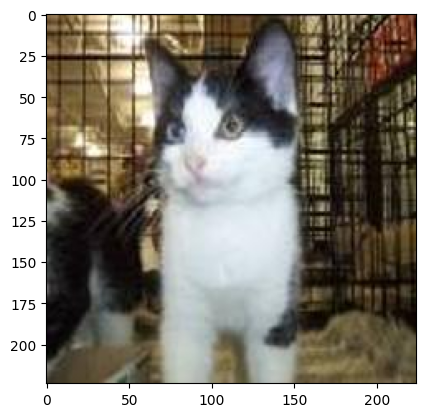

In [14]:
img = mpimg.imread(r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train_resized\cat.1000.jpg")
plt.imshow(img)

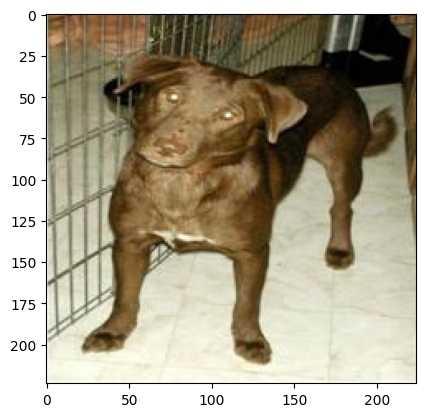

In [15]:
img = mpimg.imread(r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train_resized\dog.1.jpg")
plt.imshow(img)

# 4. Ceating the label for cat = 0 and dog = 1 

In [16]:
labels= []
filename = os.listdir(r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train_resized")

for i in range(2000):
    file_name = filename[i]
    label = file_name[0:3]

    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)
        

In [17]:
print(label[0:10])
print(len(label))

dog
3


In [18]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


# 5. Converting all resized image into numpy array

In [19]:
resized_path = r"C:\Users\User\Desktop\Bikash Limbu\Deep learning\Cat Vs Dog Classification Using Tranfer Learning\train_resized"

image_extensions = ['jpg', 'png']
files = []

# Correct glob usage
for ext in image_extensions:
    files.extend(glob.glob(os.path.join(resized_path, f"*.{ext}")))

print("Total images found:", len(files))

# Read images safely
images = []

for file in files:
    img = cv2.imread(file)
    if img is not None:
        images.append(img)

dog_cat_img = np.array(images)

print("Final image array shape:", dog_cat_img.shape)


Total images found: 2000
Final image array shape: (2000, 224, 224, 3)


In [20]:
# print(dog_cat_img)

In [21]:
type(dog_cat_img)

numpy.ndarray

In [22]:
dog_cat_img.shape

(2000, 224, 224, 3)

# 6. Train Test split

In [24]:
X = dog_cat_img
y= np.asarray(labels)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


# 7. Scaling the data


In [28]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [46]:
X_train_scaled = X_train_scaled.astype("float32")

MemoryError: Unable to allocate 919. MiB for an array with shape (1600, 224, 224, 3) and data type float32

In [30]:
# print(X_train_scaled)

# 8. Building the Neural Network

In [36]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer( mobilenet_model,input_shape=(224,224,3),trainable=False)

In [42]:
# num_of_classes = 2

# model = tf.keras.Sequential([
#     pretrained_model,
#     tf.keras.layers.Dense(num_of_classes)
    
# ])
# model.summary()

In [41]:
num_of_classes = 2

inputs = tf.keras.Input(shape=(224, 224, 3))

# Wrap TF Hub model inside Lambda
x = tf.keras.layers.Lambda(lambda img: pretrained_model(img))(inputs)

x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_of_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,226 (641.51 KB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [47]:
model.fit(X_train_scaled, y_train, epochs=5)

MemoryError: Unable to allocate 919. MiB for an array with shape (1600, 224, 224, 3) and data type float32

In [ ]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test loss = ', score)
print('Test Accuracy =', acc)

(1600, 224, 224, 3)
float64


# 9. Making the predicting system

In [48]:
from pathlib import Path
# the image path is not in quotes like " "
input_image_path = Path(input("Enter image path: "))
# "C:\Users\User\Desktop\Bikash Limbu\Neural Network\MNIST Handwritten Digit Classification\MNIST_digit.png"
input_image = cv2.imread(input_image_path)

# input_img_path = input('path of the image to be predicted:')
# input_image = cv2.imread(input_img_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224, ))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
    print('The image is cat:')
else:
    print('The image is dog:')

    

path of the image to be predicted: 0
